Generate a TensorFlow model that predicts values in a sinewave. Based on the code by Pete Warden at https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/create_sine_model.ipynb

In [162]:
# %tensorflow_version 2.1

In [163]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [164]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.26.4
TensorFlow 2.16.1
Keras 3.4.1


In [165]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

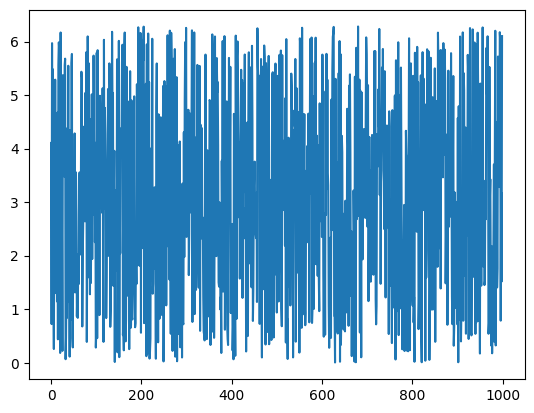

In [166]:
# Generate some random samples
np.random.seed(1000)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

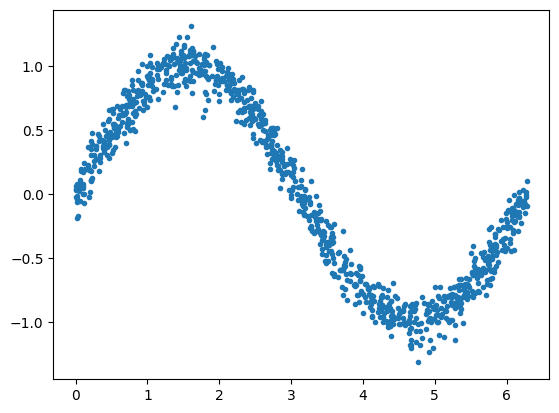

In [167]:
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

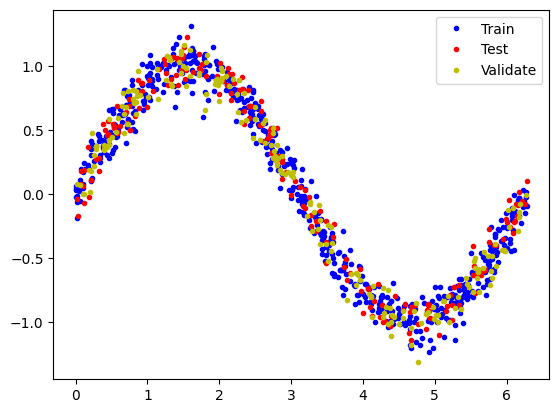

In [168]:
# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [169]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))  # Initial layer with 16 units and ReLU activation
model.add(layers.Dense(1))  # Output layer with 1 unit

# View model summary
model.summary()

# Get the weights and bias of the first layer
weights, bias = model.layers[0].get_weights()
print("Weights of the first layer:", weights)
print("Bias of the first layer:", bias)



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

Weights of the first layer: [[-0.2923711   0.16470742  0.32851595  0.3196758  -0.16191393  0.16425103
  -0.5704103  -0.56118745  0.42075646  0.12054408  0.50034845  0.18287337
  -0.00580847 -0.485819    0.05333012 -0.5359703 ]]
Bias of the first layer: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [170]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [171]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.0043 - mae: 1.0043 - val_loss: 0.8738 - val_mae: 0.8738
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8991 - mae: 0.8991 - val_loss: 0.8039 - val_mae: 0.8039
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8179 - mae: 0.8179 - val_loss: 0.7512 - val_mae: 0.7512
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7466 - mae: 0.7466 - val_loss: 0.7058 - val_mae: 0.7058
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6963 - mae: 0.6963 - val_loss: 0.6625 - val_mae: 0.6625
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6450 - mae: 0.6450 - val_loss: 0.6235 - val_mae: 0.6235
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6087 - mae: 0.6087 - val_loss: 0.5993 - val_mae: 0.5993
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5741 - mae: 0.5741 - val_loss: 0.5805 - val_mae: 0.5805
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5710 - mae: 0.5710 - val_loss: 0

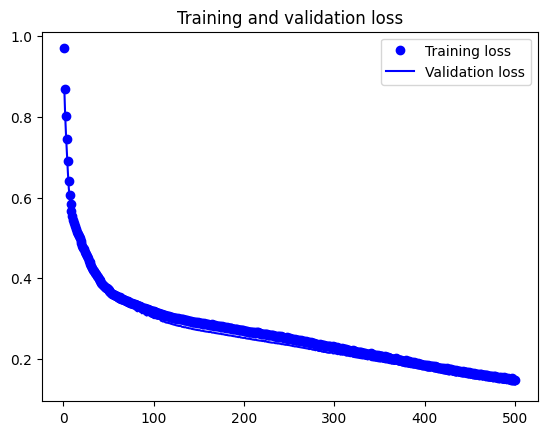

In [172]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


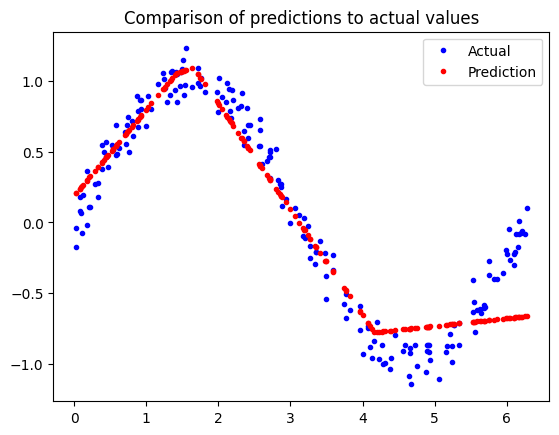

In [173]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

In [174]:
# # Convert Keras model to a tflite model
# converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Saving Model
model.save('FC.h5')
model.export("saved_model")

# Convert the saved model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_161')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140340877561296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140340877566480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140340877558608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140340877559376: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1719579156.582549   19192 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1719579156.582560   19192 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-06-28 08:52:36.582672: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2024-06-28 08:52:36.582934: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-28 08:52:36.582941: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2024-06-28 08:52:36.585938: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-06-28 08:52:36.597053: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2024-06-28 08:52:36.600948: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 18279 microseconds.


1700

In [175]:
def get_data():
  """
  The code will generate a set of random `x` values
  """
  # Generate a uniformly distributed set of random numbers in the range from
  # 0 to 2π, which covers a complete sine wave oscillation
  x_values = np.random.uniform(low=0, high=2 * math.pi,
                               size=1000).astype(np.float32)

  # Shuffle the values to guarantee they're not in order
  np.random.shuffle(x_values)

  return x_values

In [176]:
x_values = get_data()

def representative_dataset(num_samples=500):
    for i in range(num_samples):
      yield [x_values[i].reshape(1, 1)]

converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32
converter.representative_dataset = representative_dataset
tflite_quant_model = converter.convert()

# Save the quantized model
with open('quantized_sine_model_16bit.tflite', 'wb') as f:
    f.write(tflite_quant_model)



W0000 00:00:1719579156.661984   19192 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1719579156.661995   19192 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-06-28 08:52:36.662107: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2024-06-28 08:52:36.662364: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-28 08:52:36.662371: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model
2024-06-28 08:52:36.665335: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-06-28 08:52:36.676290: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model
2024-06-28 08:52:36.680151: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 18046 microseconds.
fully_quantize: 0, inference_type: 6, input_inference_type: 

In [177]:
import tensorflow as tf
import numpy as np
import os

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="quantized_sine_model_16bit.tflite", experimental_preserve_all_tensors=True)
interpreter.allocate_tensors()

# Get the details of the tensors in the model
tensor_details = interpreter.get_tensor_details()

# Extract the weights from the tensors
weights = {}
for tensor in tensor_details:
    tensor_name = tensor['name']
    tensor_index = tensor['index']
    tensor_data = interpreter.tensor(tensor_index)()
    weights[tensor_name] = tensor_data

# Print or save the weights
for name, data in weights.items():
    print(f"Name: {name}")
    print(f"Shape: {data.shape}")
    print(f"Data: {data}\n")

os.makedirs('weights', exist_ok=True)

for name, data in weights.items():
    # Clean the tensor name to be a valid file name
    clean_name = name.replace('/', '_')
    # Save each tensor's data as a numpy array
    np.save(os.path.join('weights', f"{clean_name}.npy"), data)

# Open the header file for writing
with open(os.path.join('weights.h'), 'w') as header_file:
    header_file.write("#ifndef WEIGHTS_H\n")
    header_file.write("#include <stdint.h>\n\n")

    # Write each tensor's data as a C array
    for name, data in weights.items():
        # Clean the tensor name to be a valid C identifier
        clean_name = name.replace('/', '_').replace(':', '_').replace(';','_');

        # Write the array definition
        header_file.write(f"// {name}\n")
        header_file.write(f"const int8_t {clean_name}[] = {{\n")

        # Write the array data
        flat_data = data.flatten()
        for i, value in enumerate(flat_data):
            if i % 10 == 0:
                header_file.write("\n    ")
            header_file.write(f"{value}, ")
        header_file.write("\n};\n\n")

    header_file.write("#endif // WEIGHTS_H\n")

Name: serving_default_keras_tensor_161:0
Shape: (1, 1)
Data: [[-1.6437664e+19]]

Name: tfl.pseudo_qconst
Shape: (1,)
Data: [241]

Name: tfl.pseudo_qconst1
Shape: (1, 16)
Data: [[ -4  17 -31  26 -22 -26 -10   9 -36 -45  24   9  15 -11 127 -24]]

Name: tfl.pseudo_qconst2
Shape: (16,)
Data: [     0    604  -6867    620      0  -5709      0      0  -7013  -5345
    624    587      0      0 -10419      0]

Name: tfl.pseudo_qconst3
Shape: (16, 1)
Data: [[ -65]
 [  42]
 [ 104]
 [  77]
 [ -36]
 [  84]
 [-127]
 [-125]
 [ 121]
 [  79]
 [ 117]
 [  46]
 [  -1]
 [-108]
 [  62]
 [-119]]

Name: tfl.quantize
Shape: (1, 1)
Data: [[48]]

Name: sequential_11_1/dense_28_1/MatMul;sequential_11_1/dense_28_1/Relu;sequential_11_1/dense_28_1/Add
Shape: (1, 16)
Data: [[  16  -96 -117    8    0    0    0    0  -15    0    0    0    0    0
     0    0]]

Name: StatefulPartitionedCall_1:01
Shape: (1, 1)
Data: [[-40]]

Name: StatefulPartitionedCall_1:0
Shape: (1, 1)
Data: [[2.436217e-26]]



In [178]:
import numpy as np
import tensorflow as tf

# Load your TFLite model
interpreter = tf.lite.Interpreter(model_path="quantized_sine_model_16bit.tflite")
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Extract the scale and zero point for the input
input_scale, input_zero_point = input_details[0]['quantization']

# Extract the scale and zero point for the output
output_scale, output_zero_point = output_details[0]['quantization']

print(f"Input scale: {input_scale}, Input zero point: {input_zero_point}")
print(f"Output scale: {output_scale}, Output zero point: {output_zero_point}")

# Function to get quantization parameters
def get_quantization_params(tensor_details):
    params = {}
    for tensor in tensor_details:
        if 'quantization' in tensor and tensor['quantization'][0] != 0:
            params[tensor['name']] = {
                'scale': tensor['quantization'][0],
                'zero_point': tensor['quantization'][1]
            }
    return params

tensor_details = interpreter.get_tensor_details()

# Extract quantization parameters
quant_params = get_quantization_params(tensor_details)

# Print quantization parameters
for name, params in quant_params.items():
    print(f"Tensor: {name}, Scale: {params['scale']}, Zero Point: {params['zero_point']}")

# Example of using these parameters to compute multiplier and shift
def calculate_multiplier_and_shift(scale):
    # In TFLite, the multiplier is a fixed-point representation of the scale.
    # Typically, you can use a method similar to this to get the multiplier and shift.

    significand, exponent = np.frexp(scale)
    multiplier = int(significand * (1 << 31))
    shift = -exponent

    return multiplier, shift

# For each tensor, calculate and print multiplier and shift
for name, params in quant_params.items():
    multiplier, shift = calculate_multiplier_and_shift(params['scale'])
    print(f"Tensor: {name}, Multiplier: {multiplier}, Shift: {shift}")


with open('quantized_sine_model_scales.txt', 'w') as f:
    f.write(f"Input scale: {input_scale}, Input zero point: {input_zero_point}\n")
    f.write(f"Output scale: {output_scale}, Output zero point: {output_zero_point}")


Input scale: 0.0, Input zero point: 0
Output scale: 0.0, Output zero point: 0
Tensor: tfl.pseudo_qconst, Scale: 0.00030077926930971444, Zero Point: 0
Tensor: tfl.pseudo_qconst1, Scale: 0.022735726088285446, Zero Point: 0
Tensor: tfl.pseudo_qconst2, Scale: 0.00011064906721003354, Zero Point: 0
Tensor: tfl.pseudo_qconst3, Scale: 0.004491419997066259, Zero Point: 0
Tensor: tfl.quantize, Scale: 0.02463565394282341, Zero Point: -128
Tensor: sequential_11_1/dense_28_1/MatMul;sequential_11_1/dense_28_1/Relu;sequential_11_1/dense_28_1/Add, Scale: 0.013229367323219776, Zero Point: -128
Tensor: StatefulPartitionedCall_1:01, Scale: 0.00730536924675107, Zero Point: -22
Tensor: tfl.pseudo_qconst, Multiplier: 1322841216, Shift: 11
Tensor: tfl.pseudo_qconst1, Multiplier: 1562387200, Shift: 5
Tensor: tfl.pseudo_qconst2, Multiplier: 1946558976, Shift: 13
Tensor: tfl.pseudo_qconst3, Multiplier: 1234592128, Shift: 7
Tensor: tfl.quantize, Multiplier: 1692949248, Shift: 5
Tensor: sequential_11_1/dense_28_1